In [1413]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
#Import all packages
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statistics
from scipy import stats

import sklearn
from sklearn import  preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# File import

df=pd.read_csv('medical_clean.csv', index_col=0)
df.describe()

,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,1.001400,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,1.008117,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,0.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,0.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,1.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,2.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,7.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [6]:
# Get descriptive statistics for all columns
desc = df.describe(include='all')

# Transpose the descriptive statistics DataFrame
transposed_desc = desc.transpose()

print(transposed_desc)

                      count unique                                   top  \
Customer_id           10000  10000                               C412403   
Interaction           10000  10000  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
UID                   10000  10000      3a83ddb66e2ae73798bdf1d705dc0932   
City                  10000   6072                               Houston   
State                 10000     52                                    TX   
County                10000   1607                             Jefferson   
Zip                 10000.0    NaN                                   NaN   
Lat                 10000.0    NaN                                   NaN   
Lng                 10000.0    NaN                                   NaN   
Population          10000.0    NaN                                   NaN   
Area                  10000      3                                 Rural   
TimeZone              10000     26                      America/New_York   
Job         

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Marital  

In [4]:
max_values = df.max()

# Display the highest values for each column
print(max_values)

Customer_id                                        Z996563
Interaction           fff39bdf-76c5-4155-ab94-f8fae651ea0c
UID                       fff91e090e101fcc47437667695f502c
City                                          Zumbro Falls
State                                                   WY
County                                             Ziebach
Zip                                                  99929
Lat                                               70.56099
Lng                                              -65.29017
Population                                          122814
Area                                                 Urban
TimeZone                                  Pacific/Honolulu
Job                                           Youth worker
Children                                                10
Age                                                     89
Income                                            207249.1
Marital                                            Widow

In [1416]:
#Drop the less meaningul columns from the data set
df = df.drop(columns = ['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Gender',
                        'Population', 'Area', 'TimeZone', 'Job', 'Marital', 'Full_meals_eaten', 'Soft_drink', 'Services','Item1', 
                        'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])

In [1417]:
#list column names
df.columns

Index(['Children', 'Age', 'Income', 'ReAdmis', 'VitD_levels', 'Doc_visits',
       'vitD_supp', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Initial_days', 'TotalCharge',
       'Additional_charges'],
      dtype='object')

In [1418]:
df.ReAdmis.value_counts()

ReAdmis
No     6331
Yes    3669
Name: count, dtype: int64

In [1419]:
df.Complication_risk.value_counts()

Complication_risk
Medium    4517
High      3358
Low       2125
Name: count, dtype: int64

In [1420]:
df.Overweight.value_counts()

Overweight
Yes    7094
No     2906
Name: count, dtype: int64

In [1421]:
df.Arthritis.value_counts()

Arthritis
No     6426
Yes    3574
Name: count, dtype: int64

In [1422]:
df.Diabetes.value_counts()

Diabetes
No     7262
Yes    2738
Name: count, dtype: int64

In [1423]:
df.Hyperlipidemia.value_counts()

Hyperlipidemia
No     6628
Yes    3372
Name: count, dtype: int64

In [1424]:
df.BackPain.value_counts()

BackPain
No     5886
Yes    4114
Name: count, dtype: int64

In [1425]:
df.Anxiety.value_counts()

Anxiety
No     6785
Yes    3215
Name: count, dtype: int64

In [1426]:
df.Reflux_esophagitis.value_counts()

Reflux_esophagitis
No     5865
Yes    4135
Name: count, dtype: int64

In [1427]:
df.Asthma.value_counts()

Asthma
No     7107
Yes    2893
Name: count, dtype: int64

In [1428]:
df.Initial_admin.value_counts()

Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

In [1429]:
df.HighBlood.value_counts()

HighBlood
No     5910
Yes    4090
Name: count, dtype: int64

In [1430]:
df.Stroke.value_counts()

Stroke
No     8007
Yes    1993
Name: count, dtype: int64

In [1431]:
df.Allergic_rhinitis.value_counts()

Allergic_rhinitis
No     6059
Yes    3941
Name: count, dtype: int64

In [1432]:
#Variables

print(df)

           Children  Age    Income ReAdmis  VitD_levels  Doc_visits  \
CaseOrder                                                             
1                 1   53  86575.93      No    19.141466           6   
2                 3   51  46805.99      No    18.940352           4   
3                 3   53  14370.14      No    18.057507           4   
4                 0   78  39741.49      No    16.576858           4   
5                 1   22   1209.56      No    17.439069           5   
...             ...  ...       ...     ...          ...         ...   
9996              2   25  45967.61      No    16.980860           4   
9997              4   87  14983.02     Yes    18.177020           5   
9998              3   45  65917.81     Yes    17.129070           4   
9999              3   43  29702.32     Yes    19.910430           5   
10000             8   70  62682.63     Yes    18.388620           5   

           vitD_supp          Initial_admin HighBlood Stroke  ... Diabetes  

In [1433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Children            10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Income              10000 non-null  float64
 3   ReAdmis             10000 non-null  object 
 4   VitD_levels         10000 non-null  float64
 5   Doc_visits          10000 non-null  int64  
 6   vitD_supp           10000 non-null  int64  
 7   Initial_admin       10000 non-null  object 
 8   HighBlood           10000 non-null  object 
 9   Stroke              10000 non-null  object 
 10  Complication_risk   10000 non-null  object 
 11  Overweight          10000 non-null  object 
 12  Arthritis           10000 non-null  object 
 13  Diabetes            10000 non-null  object 
 14  Hyperlipidemia      10000 non-null  object 
 15  BackPain            10000 non-null  object 
 16  Anxiety  

In [1434]:
 #Identify categorical columns (those with dtype 'object')
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [1435]:
# Convert categorical columns to one-hot encoded format
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Print the DataFrame with encoded categorical columns
print("DataFrame with One-Hot Encoded Categorical Columns:\n", df_encoded)

DataFrame with One-Hot Encoded Categorical Columns:
            Children  Age    Income  VitD_levels  Doc_visits  vitD_supp  \
CaseOrder                                                                
1                 1   53  86575.93    19.141466           6          0   
2                 3   51  46805.99    18.940352           4          1   
3                 3   53  14370.14    18.057507           4          0   
4                 0   78  39741.49    16.576858           4          0   
5                 1   22   1209.56    17.439069           5          2   
...             ...  ...       ...          ...         ...        ...   
9996              2   25  45967.61    16.980860           4          1   
9997              4   87  14983.02    18.177020           5          0   
9998              3   45  65917.81    17.129070           4          0   
9999              3   43  29702.32    19.910430           5          1   
10000             8   70  62682.63    18.388620           5

In [1436]:
# Drop the dependent variable 'Churn' from the DataFrame for independent variable analysis
independent_variable_df = df_encoded.drop('TotalCharge', axis=1)

# Calculate and print descriptive statistics for independent variables
print("\nDescriptive Statistics for Independent Variables:\n", independent_variable_df.describe())


Descriptive Statistics for Independent Variables:
            Children           Age         Income   VitD_levels    Doc_visits  \
count  10000.000000  10000.000000   10000.000000  10000.000000  10000.000000   
mean       2.097200     53.511700   40490.495160     17.964262      5.012200   
std        2.163659     20.638538   28521.153293      2.017231      1.045734   
min        0.000000     18.000000     154.080000      9.806483      1.000000   
25%        0.000000     36.000000   19598.775000     16.626439      4.000000   
50%        1.000000     53.000000   33768.420000     17.951122      5.000000   
75%        3.000000     71.000000   54296.402500     19.347963      6.000000   
max       10.000000     89.000000  207249.100000     26.394449      9.000000   

          vitD_supp  Initial_days  Additional_charges  
count  10000.000000  10000.000000        10000.000000  
mean       0.398900     34.455299        12934.528587  
std        0.628505     26.309341         6542.601544  
min

In [1437]:
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['ReAdmis']= label_encoder.fit_transform(df['ReAdmis']) 

In [1438]:
df['ReAdmis'].unique() 

array([0, 1])

In [1439]:
df['ReAdmis_num'] = df['ReAdmis']

In [1440]:
df_numeric={"ReAdmis_num":{"No":0, "Yes": 1}}

In [1441]:
df.replace(df_numeric, inplace=True)

In [1442]:
df['Initial_admin'].unique() 

array(['Emergency Admission', 'Elective Admission',
       'Observation Admission'], dtype=object)

In [1443]:
df['Initial_admin_num'] = df['Initial_admin']

In [1444]:
df_numeric={"Initial_admin_num":{"Emergency Admission": 0, "Elective Admission": 1, "Observation Admission": 2}}

In [1445]:
df.replace(df_numeric, inplace=True)

/var/folders/0d/rlhyvwj51_b721yhvzc8jmgw0000gn/T/ipykernel_893/1412296750.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [1446]:
df['HighBlood'].unique() 

array(['Yes', 'No'], dtype=object)

In [1447]:
df['HighBlood_num'] = df['HighBlood']

In [1448]:
df_numeric={"HighBlood_num":{"No":0, "Yes": 1}}

In [1449]:
df.replace(df_numeric, inplace=True)

/var/folders/0d/rlhyvwj51_b721yhvzc8jmgw0000gn/T/ipykernel_893/1412296750.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [1450]:
df['Stroke'].unique() 

array(['No', 'Yes'], dtype=object)

In [1451]:
df['Stroke_num'] = df['Stroke']

In [1452]:
df_numeric={"Stroke_num":{"No":0, "Yes": 1}}

In [1453]:
df.replace(df_numeric, inplace=True)

/var/folders/0d/rlhyvwj51_b721yhvzc8jmgw0000gn/T/ipykernel_893/1412296750.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [1454]:
df['Complication_risk'].unique() 

array(['Medium', 'High', 'Low'], dtype=object)

In [1455]:
df['Complication_risk_num'] = df['Complication_risk']

In [1456]:
df_numeric={"Complication_risk_num":{"Medium":0, "High": 1, "Low": 2}}

In [1457]:
df.replace(df_numeric, inplace=True)

/var/folders/0d/rlhyvwj51_b721yhvzc8jmgw0000gn/T/ipykernel_893/1412296750.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [1458]:
df['Overweight'].unique() 

array(['No', 'Yes'], dtype=object)

In [1459]:
df['Overweight_num'] = df['Overweight']

In [1460]:
df_numeric={"Overweight_num":{"No":0, "Yes": 1}}

In [1461]:
df.replace(df_numeric, inplace=True)

/var/folders/0d/rlhyvwj51_b721yhvzc8jmgw0000gn/T/ipykernel_893/1412296750.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [1462]:
df['Arthritis'].unique() 

array(['Yes', 'No'], dtype=object)

In [1463]:
df['Arthritis_num'] = df['Arthritis']

In [1464]:
df_numeric={"Arthritis_num":{"No":0, "Yes": 1}}

In [1465]:
df.replace(df_numeric, inplace=True)

/var/folders/0d/rlhyvwj51_b721yhvzc8jmgw0000gn/T/ipykernel_893/1412296750.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [1466]:
df['Diabetes'].unique() 

array(['Yes', 'No'], dtype=object)

In [1467]:
df['Diabetes_num'] = df['Diabetes']

In [1468]:
df_numeric={"Diabetes_num":{"No":0, "Yes": 1}}

In [1469]:
df.replace(df_numeric, inplace=True)

/var/folders/0d/rlhyvwj51_b721yhvzc8jmgw0000gn/T/ipykernel_893/1412296750.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [1470]:
df['BackPain'].unique() 

array(['Yes', 'No'], dtype=object)

In [1471]:
df['BackPain_num'] = df['BackPain']

In [1472]:
df_numeric={"BackPain_num":{"No":0, "Yes": 1}}

In [1473]:
df.replace(df_numeric, inplace=True)

/var/folders/0d/rlhyvwj51_b721yhvzc8jmgw0000gn/T/ipykernel_893/1412296750.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [1474]:
df['Anxiety'].unique() 

array(['Yes', 'No'], dtype=object)

In [1475]:
df['Anxiety_num'] = df['Anxiety']

In [1476]:
df_numeric={"Anxiety_num":{"No":0, "Yes": 1}}

In [1477]:
df.replace(df_numeric, inplace=True)

/var/folders/0d/rlhyvwj51_b721yhvzc8jmgw0000gn/T/ipykernel_893/1412296750.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [1478]:
df['Allergic_rhinitis'].unique() 

array(['Yes', 'No'], dtype=object)

In [1479]:
df['Allergic_rhinitis_num'] = df['Allergic_rhinitis']

In [1480]:
df_numeric={"Allergic_rhinitis_num":{"No":0, "Yes": 1}}

In [1481]:
df.replace(df_numeric, inplace=True)

/var/folders/0d/rlhyvwj51_b721yhvzc8jmgw0000gn/T/ipykernel_893/1412296750.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [1482]:
df['Reflux_esophagitis'].unique() 

array(['No', 'Yes'], dtype=object)

In [1483]:
df['Reflux_esophagitis_num'] = df['Reflux_esophagitis']

In [1484]:
df_numeric={"Reflux_esophagitis_num":{"No":0, "Yes": 1}}

In [1485]:
df.replace(df_numeric, inplace=True)

/var/folders/0d/rlhyvwj51_b721yhvzc8jmgw0000gn/T/ipykernel_893/1412296750.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [1486]:
df['Asthma'].unique() 

array(['Yes', 'No'], dtype=object)

In [1487]:
df['Asthma_num'] = df['Asthma']

In [1488]:
df_numeric={"Asthma_num":{"No":0, "Yes": 1}}

In [1489]:
df.replace(df_numeric, inplace=True)

/var/folders/0d/rlhyvwj51_b721yhvzc8jmgw0000gn/T/ipykernel_893/1412296750.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [1490]:
df['Hyperlipidemia'].unique() 

array(['No', 'Yes'], dtype=object)

In [1491]:
df['Hyperlipidemia_num'] = df['Hyperlipidemia']

In [1492]:
df_numeric={"Hyperlipidemia_num":{"No":0, "Yes": 1}}

In [1493]:
df.replace(df_numeric, inplace=True)

/var/folders/0d/rlhyvwj51_b721yhvzc8jmgw0000gn/T/ipykernel_893/1412296750.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [1494]:
#Updated Variables

print(df)

           Children  Age    Income  ReAdmis  VitD_levels  Doc_visits  \
CaseOrder                                                              
1                 1   53  86575.93        0    19.141466           6   
2                 3   51  46805.99        0    18.940352           4   
3                 3   53  14370.14        0    18.057507           4   
4                 0   78  39741.49        0    16.576858           4   
5                 1   22   1209.56        0    17.439069           5   
...             ...  ...       ...      ...          ...         ...   
9996              2   25  45967.61        0    16.980860           4   
9997              4   87  14983.02        1    18.177020           5   
9998              3   45  65917.81        1    17.129070           4   
9999              3   43  29702.32        1    19.910430           5   
10000             8   70  62682.63        1    18.388620           5   

           vitD_supp          Initial_admin HighBlood Stroke  .

In [1495]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Children                10000 non-null  int64  
 1   Age                     10000 non-null  int64  
 2   Income                  10000 non-null  float64
 3   ReAdmis                 10000 non-null  int64  
 4   VitD_levels             10000 non-null  float64
 5   Doc_visits              10000 non-null  int64  
 6   vitD_supp               10000 non-null  int64  
 7   Initial_admin           10000 non-null  object 
 8   HighBlood               10000 non-null  object 
 9   Stroke                  10000 non-null  object 
 10  Complication_risk       10000 non-null  object 
 11  Overweight              10000 non-null  object 
 12  Arthritis               10000 non-null  object 
 13  Diabetes                10000 non-null  object 
 14  Hyperlipidemia          10000 non-null  obj

In [1496]:
num_dup = len(df) - len(df.duplicated())
print(f"Duplicates: {num_dup} of {len(df)} records.\n")

Duplicates: 0 of 10000 records.



In [1497]:
#Drop the less meaningul columns from the data set
df = df.drop(columns = ['ReAdmis', 'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'BackPain', 'Anxiety',
                        'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Hyperlipidemia'])

In [1498]:
df.describe()

,Children,Age,Income,VitD_levels,Doc_visits,vitD_supp,Initial_days,TotalCharge,Additional_charges,ReAdmis_num,...,Complication_risk_num,Overweight_num,Arthritis_num,Diabetes_num,BackPain_num,Anxiety_num,Allergic_rhinitis_num,Reflux_esophagitis_num,Asthma_num,Hyperlipidemia_num
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,2.097200,53.511700,40490.495160,17.964262,5.012200,0.398900,34.455299,5312.172769,12934.528587,0.366900,...,0.76080,0.709400,0.357400,0.27380,0.411400,0.321500,0.394100,0.413500,0.28930,0.337200
std,2.163659,20.638538,28521.153293,2.017231,1.045734,0.628505,26.309341,2180.393838,6542.601544,0.481983,...,0.77913,0.454062,0.479258,0.44593,0.492112,0.467076,0.488681,0.492486,0.45346,0.472777
min,0.000000,18.000000,154.080000,9.806483,1.000000,0.000000,1.001981,1938.312067,3125.703000,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,36.000000,19598.775000,16.626439,4.000000,0.000000,7.896215,3179.374015,7986.487755,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,1.000000,53.000000,33768.420000,17.951122,5.000000,0.000000,35.836244,5213.952000,11573.977735,0.000000,...,1.00000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,3.000000,71.000000,54296.402500,19.347963,6.000000,1.000000,61.161020,7459.699750,15626.490000,1.000000,...,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
max,10.000000,89.000000,207249.100000,26.394449,9.000000,5.000000,71.981490,9180.728000,30566.070000,1.000000,...,2.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [1499]:
#Prepare data
feature = ['Children', 'Age', 'Income', 'Doc_visits', 'Complication_risk_num', 'Overweight_num', 
           'Arthritis_num', 'Diabetes_num', 'Hyperlipidemia_num', 'Initial_admin_num',
           'BackPain_num', 'Anxiety_num', 'Allergic_rhinitis_num', 'Reflux_esophagitis_num', 
            'Asthma_num', 'Initial_days', 'vitD_supp', 'VitD_levels', 'Additional_charges', 
            'ReAdmis_num', 'HighBlood_num', 'Stroke_num']

X = df[feature]
y = df['TotalCharge']
X = sm.add_constant(X)

In [1500]:
#Create model [6]
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 4.602e+04
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        07:34:06   Log-Likelihood:                -67913.
No. Observations:               10000   AIC:                         1.359e+05
Df Residuals:                    9977   BIC:                         1.360e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2439

In [1501]:
# Evaluate the model
df.to_csv('Medical_prepared.csv')

In [1502]:
df.describe()

,Children,Age,Income,VitD_levels,Doc_visits,vitD_supp,Initial_days,TotalCharge,Additional_charges,ReAdmis_num,...,Complication_risk_num,Overweight_num,Arthritis_num,Diabetes_num,BackPain_num,Anxiety_num,Allergic_rhinitis_num,Reflux_esophagitis_num,Asthma_num,Hyperlipidemia_num
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,2.097200,53.511700,40490.495160,17.964262,5.012200,0.398900,34.455299,5312.172769,12934.528587,0.366900,...,0.76080,0.709400,0.357400,0.27380,0.411400,0.321500,0.394100,0.413500,0.28930,0.337200
std,2.163659,20.638538,28521.153293,2.017231,1.045734,0.628505,26.309341,2180.393838,6542.601544,0.481983,...,0.77913,0.454062,0.479258,0.44593,0.492112,0.467076,0.488681,0.492486,0.45346,0.472777
min,0.000000,18.000000,154.080000,9.806483,1.000000,0.000000,1.001981,1938.312067,3125.703000,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,36.000000,19598.775000,16.626439,4.000000,0.000000,7.896215,3179.374015,7986.487755,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,1.000000,53.000000,33768.420000,17.951122,5.000000,0.000000,35.836244,5213.952000,11573.977735,0.000000,...,1.00000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,3.000000,71.000000,54296.402500,19.347963,6.000000,1.000000,61.161020,7459.699750,15626.490000,1.000000,...,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
max,10.000000,89.000000,207249.100000,26.394449,9.000000,5.000000,71.981490,9180.728000,30566.070000,1.000000,...,2.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


<Axes: >

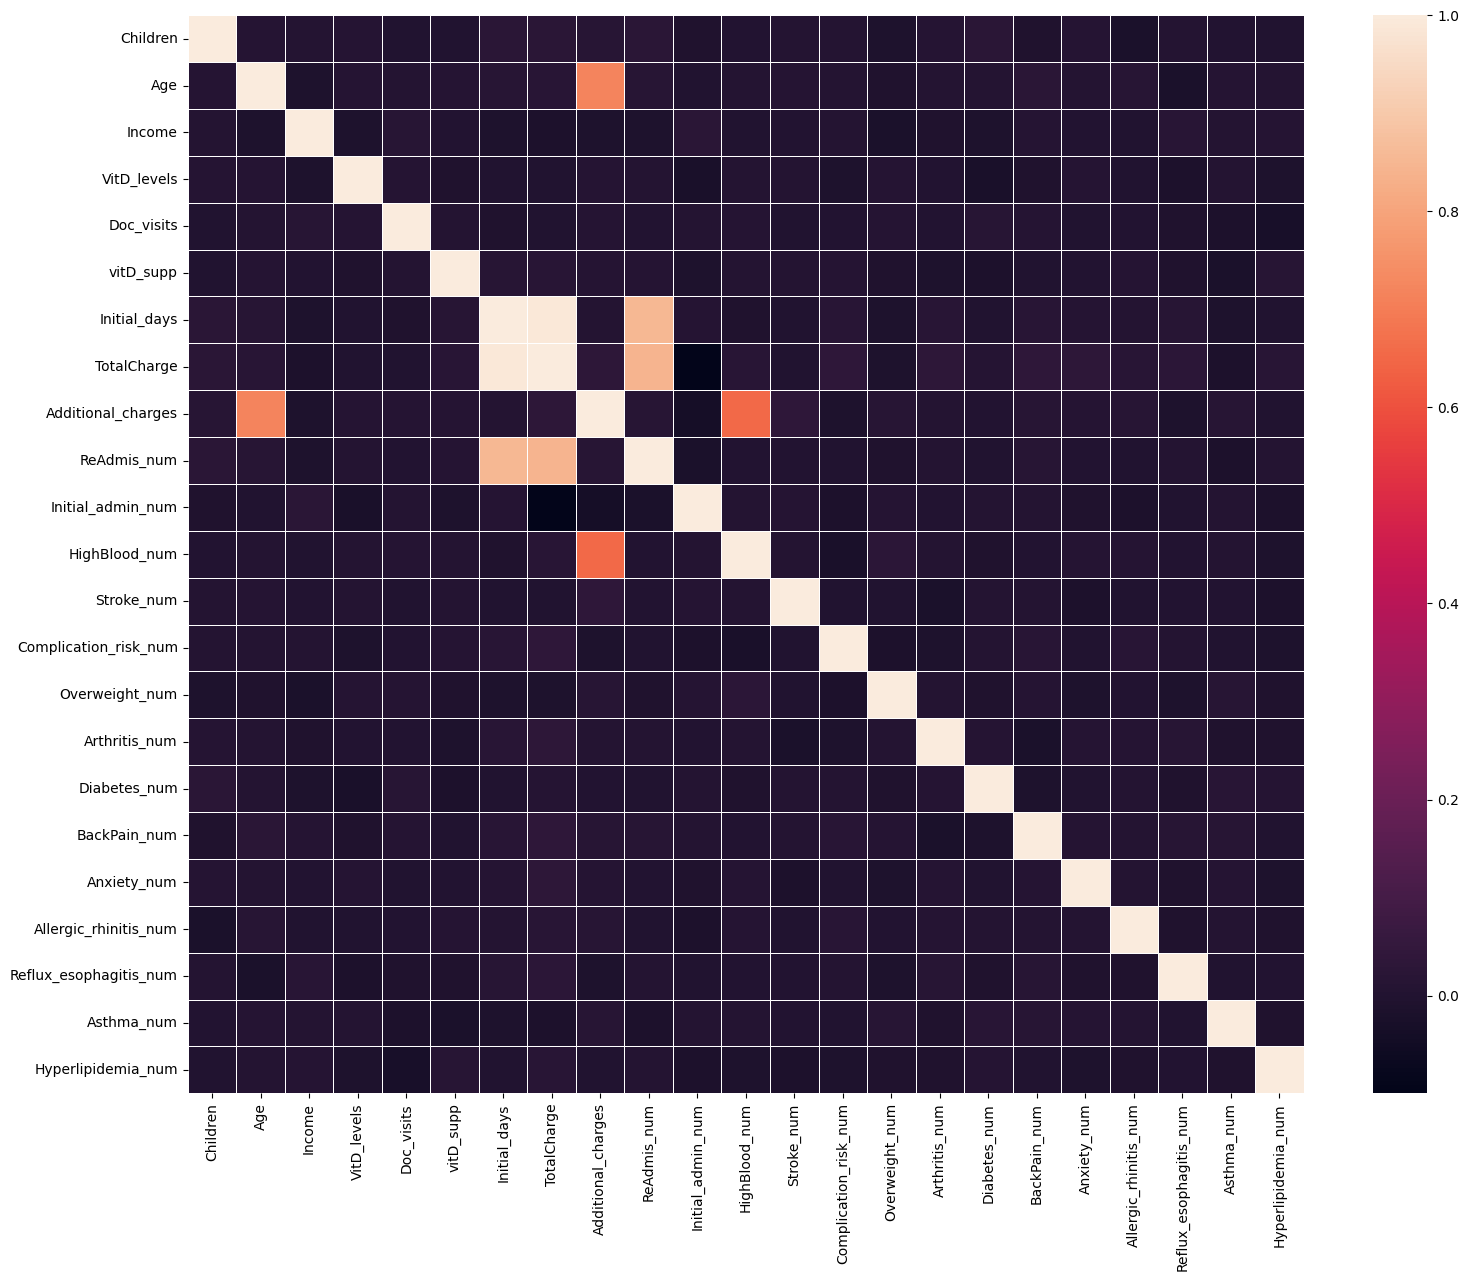

In [1503]:
#For variable selection, use a seaborn heatmap to see correlation between the columns [1][2]
plt.figure(figsize = (18, 14))
sns.heatmap(df.corr(), linewidth = 0.5)
#plt.savefig('heatmap3.jpg')

array([[<Axes: title={'center': 'Children'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Doc_visits'}>,
        <Axes: title={'center': 'Complication_risk_num'}>],
       [<Axes: title={'center': 'Overweight_num'}>,
        <Axes: title={'center': 'Arthritis_num'}>,
        <Axes: title={'center': 'Diabetes_num'}>,
        <Axes: title={'center': 'Hyperlipidemia_num'}>,
        <Axes: title={'center': 'Initial_admin_num'}>],
       [<Axes: title={'center': 'BackPain_num'}>,
        <Axes: title={'center': 'Anxiety_num'}>,
        <Axes: title={'center': 'Allergic_rhinitis_num'}>,
        <Axes: title={'center': 'Reflux_esophagitis_num'}>,
        <Axes: title={'center': 'TotalCharge'}>],
       [<Axes: title={'center': 'Asthma_num'}>,
        <Axes: title={'center': 'Initial_days'}>,
        <Axes: title={'center': 'vitD_supp'}>,
        <Axes: title={'center': 'VitD_levels'}>,
        <Axes: title={'center': 'A

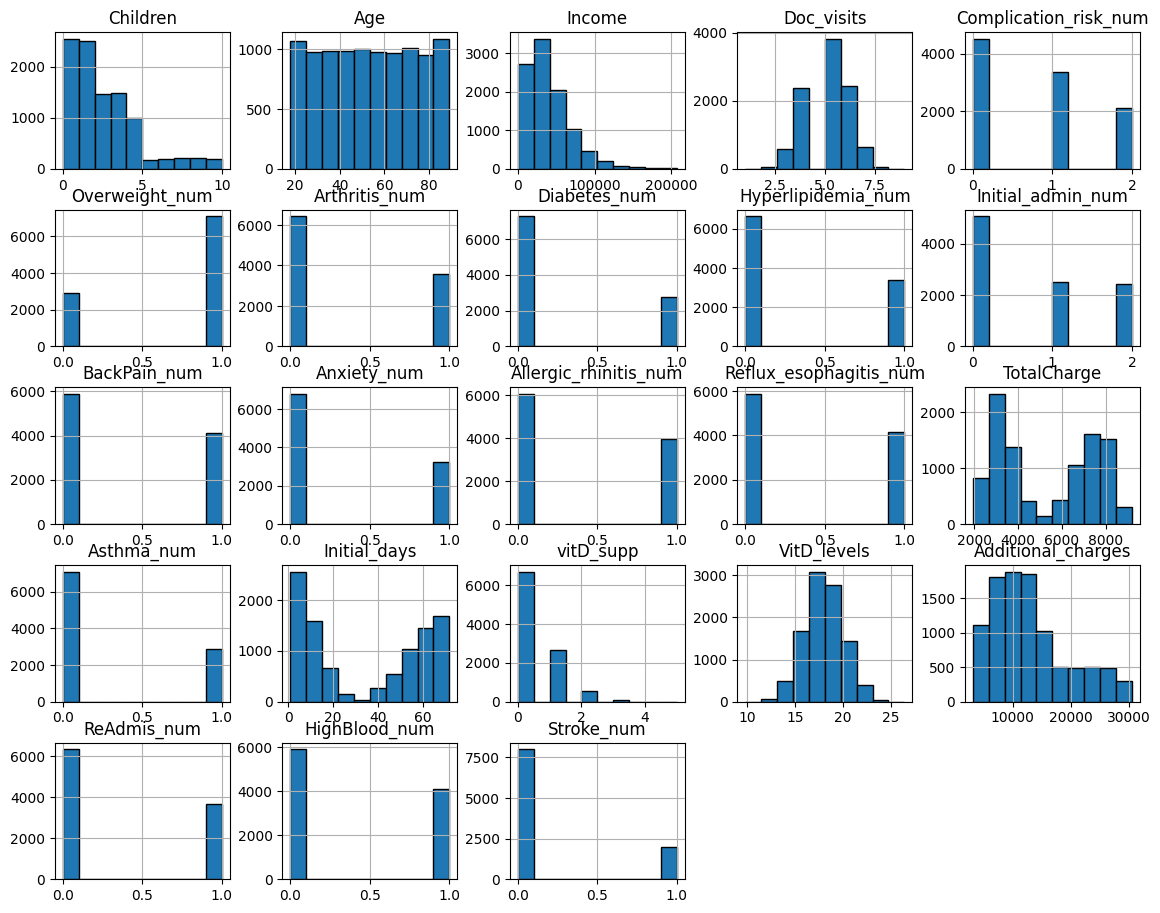

In [1504]:
#For univariate statistics, create histograms for the continuous and categorical variables
df[['Children', 'Age', 'Income', 'Doc_visits', 'Complication_risk_num', 'Overweight_num', 
           'Arthritis_num', 'Diabetes_num', 'Hyperlipidemia_num', 'Initial_admin_num',
           'BackPain_num', 'Anxiety_num', 'Allergic_rhinitis_num', 'Reflux_esophagitis_num', 
    'TotalCharge', 'Asthma_num', 'Initial_days', 'vitD_supp', 'VitD_levels', 'Additional_charges', 
    'ReAdmis_num', 'HighBlood_num', 'Stroke_num']].hist(ec = "black", figsize = (14, 11))

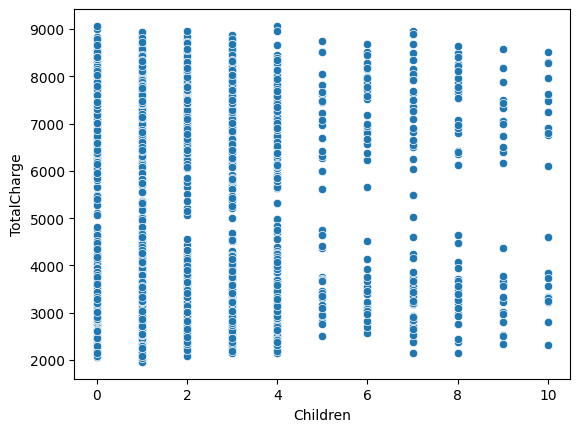

In [1505]:
subset = df.sample(frac = 0.25)

sns.scatterplot(data = subset, x = "Children", y = "TotalCharge")
plt.show()


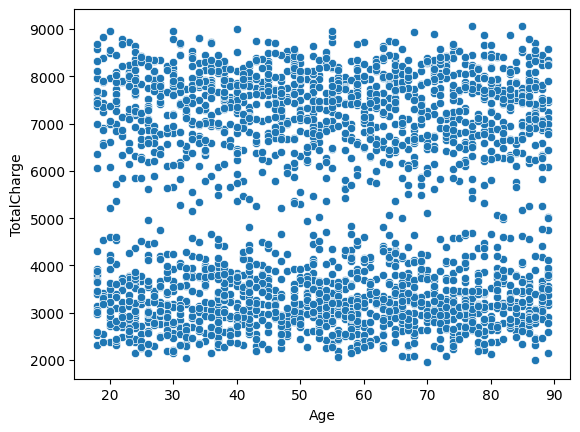

In [1506]:
sns.scatterplot(data = subset, x = "Age", y = "TotalCharge")
plt.show()

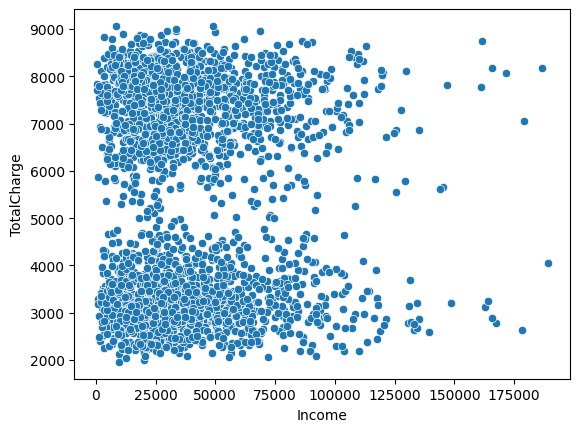

In [1507]:
sns.scatterplot(data = subset, x = "Income", y = "TotalCharge")
plt.show()

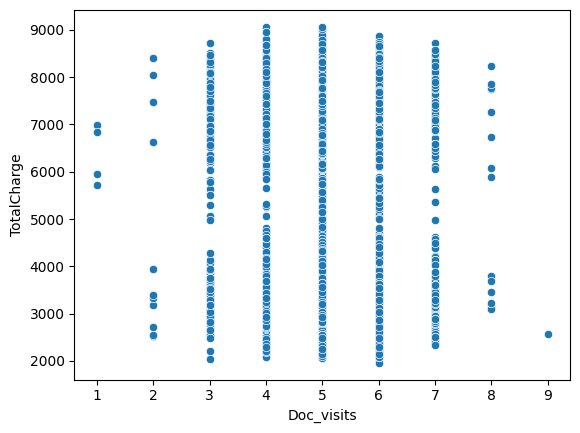

In [1508]:
sns.scatterplot(data = subset, x = "Doc_visits", y = "TotalCharge")
plt.show()

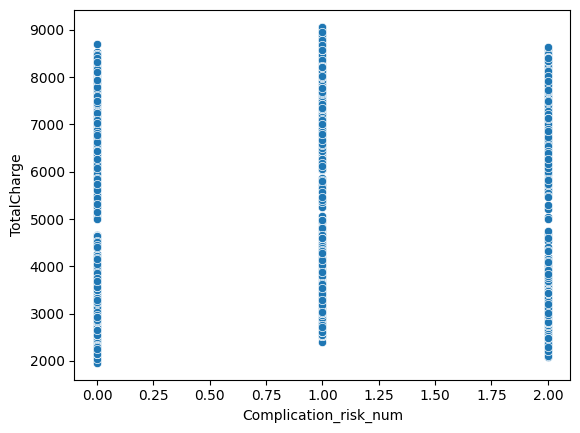

In [1509]:
sns.scatterplot(data = subset, x = "Complication_risk_num", y = "TotalCharge")
plt.show()

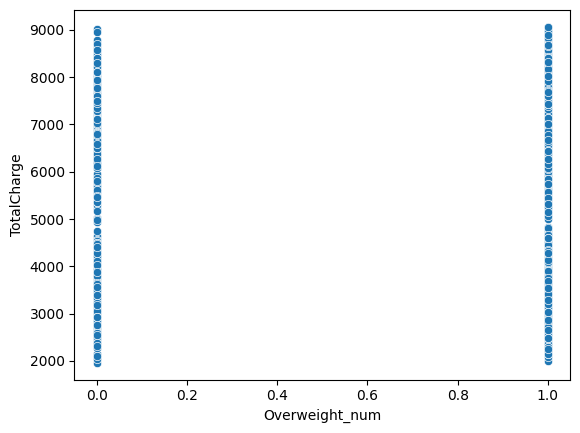

In [1510]:
sns.scatterplot(data = subset, x = "Overweight_num", y = "TotalCharge")
plt.show()

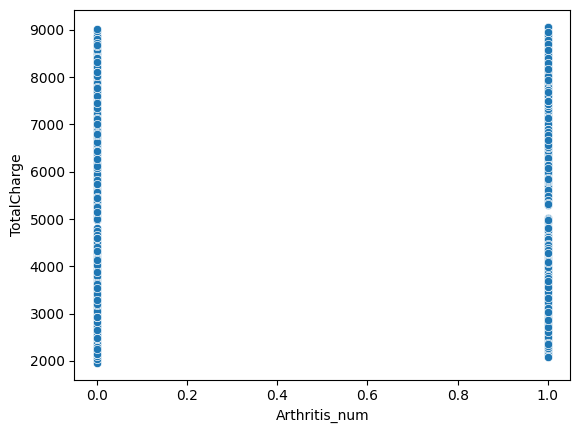

In [1511]:
sns.scatterplot(data = subset, x = "Arthritis_num", y = "TotalCharge")
plt.show()

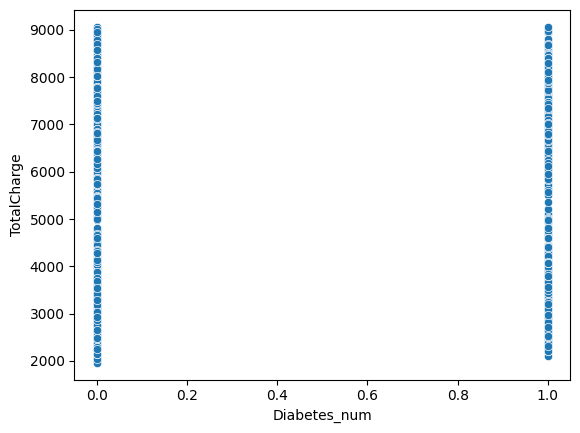

In [1512]:
sns.scatterplot(data = subset, x = "Diabetes_num", y = "TotalCharge")
plt.show()

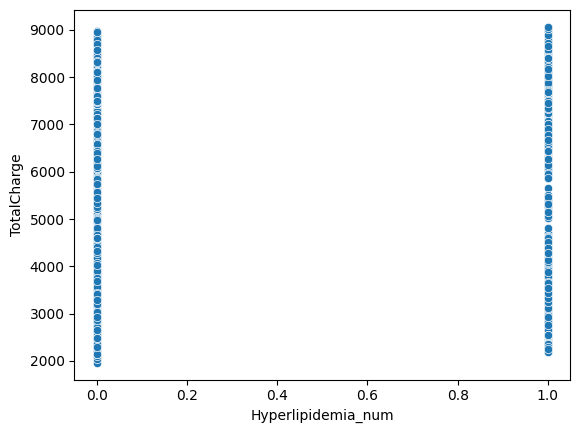

In [1513]:
sns.scatterplot(data = subset, x = "Hyperlipidemia_num", y = "TotalCharge")
plt.show()

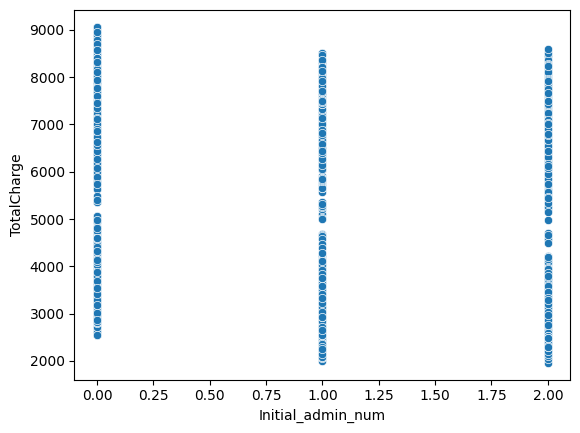

In [1514]:
sns.scatterplot(data = subset, x = "Initial_admin_num", y = "TotalCharge")
plt.show()

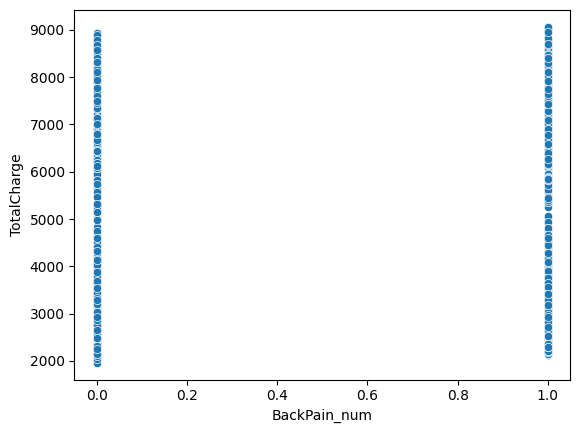

In [1515]:
sns.scatterplot(data = subset, x = "BackPain_num", y = "TotalCharge")
plt.show()

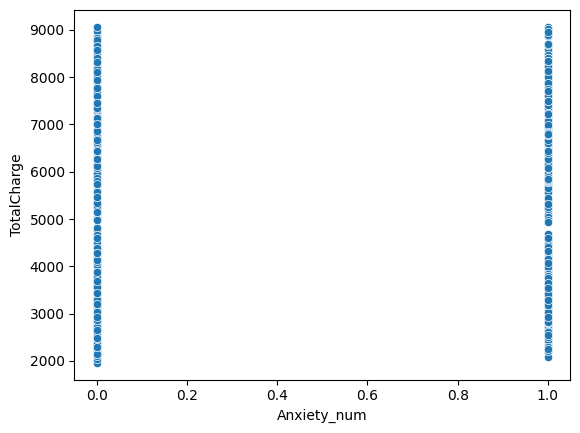

In [1516]:
sns.scatterplot(data = subset, x = "Anxiety_num", y = "TotalCharge")
plt.show()

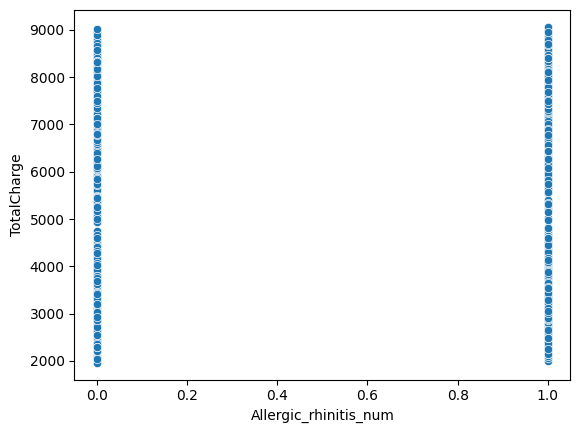

In [1517]:
sns.scatterplot(data = subset, x = "Allergic_rhinitis_num", y = "TotalCharge")
plt.show()

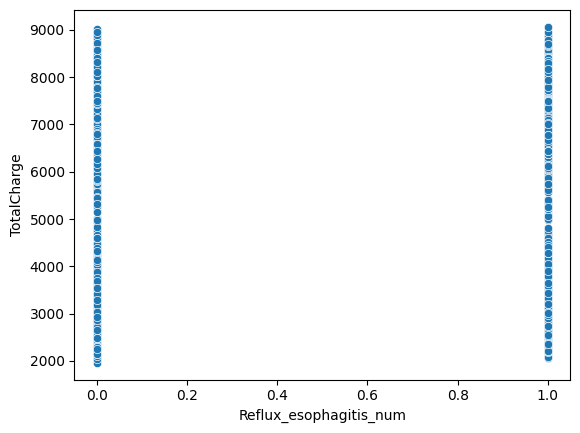

In [1518]:
sns.scatterplot(data = subset, x = "Reflux_esophagitis_num", y = "TotalCharge")
plt.show()

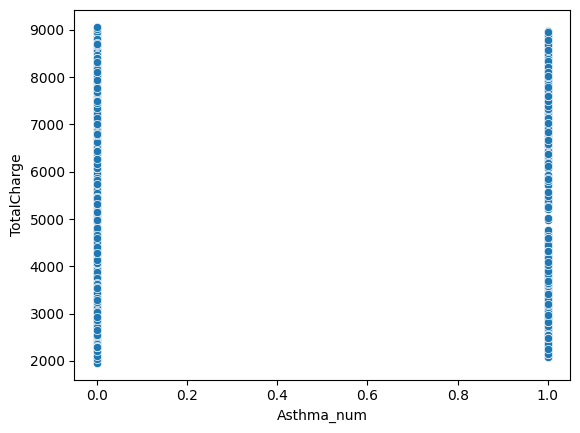

In [1519]:
sns.scatterplot(data = subset, x = "Asthma_num", y = "TotalCharge")
plt.show()

In [1520]:
#Reducing the model
df = df.drop(columns = ['Children', 'Income', 'Overweight_num', 'vitD_supp', 'VitD_levels', 'Asthma_num', 'ReAdmis_num','Stroke_num' ])

In [1521]:
#Re-Prepare data
feature = ['Age', 'Doc_visits', 'Complication_risk_num',
           'Arthritis_num', 'Diabetes_num', 'Hyperlipidemia_num', 'Initial_admin_num',
           'BackPain_num', 'Anxiety_num', 'Allergic_rhinitis_num', 'Reflux_esophagitis_num', 
           'Initial_days', 'Additional_charges', 
            'HighBlood_num']

X = df[feature]
y = df['TotalCharge']
X = sm.add_constant(X)

In [1522]:
#ReCreate model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 7.232e+04
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        07:34:16   Log-Likelihood:                -67917.
No. Observations:               10000   AIC:                         1.359e+05
Df Residuals:                    9985   BIC:                         1.360e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2446

In [1523]:
y_pred = model.predict(X)
residuals = y - y_pred

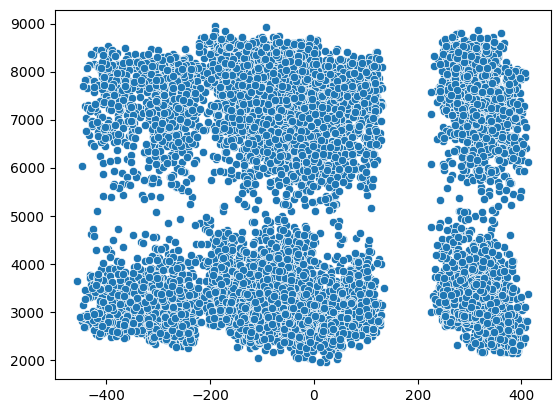

In [1524]:
sns.scatterplot(x=residuals, y=y_pred)
plt.show()

In [1525]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
reg = LinearRegression()

# Train the model
reg.fit(X_train, y_train)

# Evaluate the model
reg_score = reg.score(X_test, y_test)

# Make predictions
y_pred = reg.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print(results)
print("Model score:", reg_score)


                Actual    Predicted
CaseOrder                          
6253       6060.700000  6321.531417
4685       3255.814455  3265.304463
1732       2844.703206  2813.318953
4743       3133.944906  3554.455868
4522       4125.009552  4278.706902
...                ...          ...
6413       8219.890000  8238.036112
8286       5612.595000  5695.717118
7854       8622.724000  8715.070892
1096       2890.340759  2988.496003
6930       6318.785000  6574.330376

[2000 rows x 2 columns]
Model score: 0.9900847729117028


In [1526]:
df.describe()

,Age,Doc_visits,Initial_days,TotalCharge,Additional_charges,Initial_admin_num,HighBlood_num,Complication_risk_num,Arthritis_num,Diabetes_num,BackPain_num,Anxiety_num,Allergic_rhinitis_num,Reflux_esophagitis_num,Hyperlipidemia_num
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.511700,5.012200,34.455299,5312.172769,12934.528587,0.737600,0.409000,0.76080,0.357400,0.27380,0.411400,0.321500,0.394100,0.413500,0.337200
std,20.638538,1.045734,26.309341,2180.393838,6542.601544,0.825115,0.491674,0.77913,0.479258,0.44593,0.492112,0.467076,0.488681,0.492486,0.472777
min,18.000000,1.000000,1.001981,1938.312067,3125.703000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,4.000000,7.896215,3179.374015,7986.487755,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.000000,5.000000,35.836244,5213.952000,11573.977735,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,71.000000,6.000000,61.161020,7459.699750,15626.490000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
max,89.000000,9.000000,71.981490,9180.728000,30566.070000,2.000000,1.000000,2.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
